In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_json('../data/train.json', orient='records')
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [14]:
df.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [15]:
df['no_ingredients'] = [len(item) for item in df['ingredients']]
df.head()

,id,cuisine,ingredients,no_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


### How many different types of cuisines/classes do we have? How many recipes of each type are there?

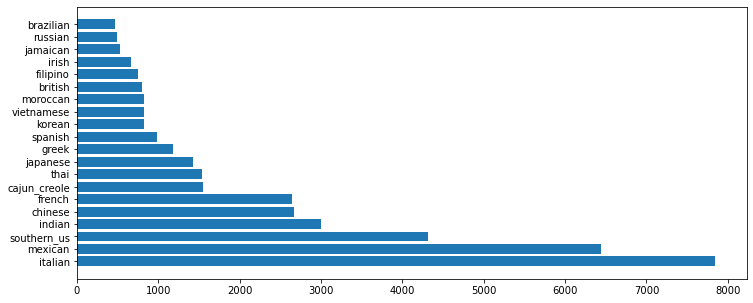

In [67]:
cuisines = df['cuisine'].value_counts().index
no_recipes = df['cuisine'].value_counts().values
plt.figure(figsize=(12,5))
plt.barh(cuisines, no_recipes)
plt.show()

*There are 20 different types of cuisine.*  
*The cuisine with the most number of recipes are Italian, Mexican, and Southern USA.*

### What are some of the recipes with the most number of ingredients?

In [65]:
temp = df.sort_values(by='no_ingredients', ascending=False)[['cuisine', 'no_ingredients']].head(40)
temp;

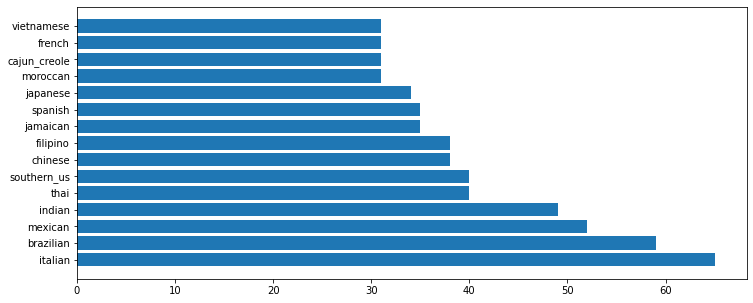

In [66]:
cuisines = temp['cuisine']
no_ingredients = temp['no_ingredients']
plt.figure(figsize=(12,5))
plt.barh(cuisines, no_ingredients)
plt.show()

*The cuisine with the most ingredients is Italian.*  

### Which cuisines have the most ingredients, on average?

In [72]:
temp = df.groupby('cuisine')['no_ingredients'].mean().sort_values(ascending=False)
temp

cuisine
moroccan        12.909866
indian          12.705961
vietnamese      12.675152
cajun_creole    12.617076
thai            12.545809
jamaican        12.214829
chinese         11.982791
korean          11.284337
mexican         10.877446
spanish         10.423660
russian         10.224949
greek           10.182128
filipino        10.000000
italian          9.909033
french           9.817838
japanese         9.735067
british          9.708955
southern_us      9.634954
brazilian        9.520343
irish            9.299850
Name: no_ingredients, dtype: float64

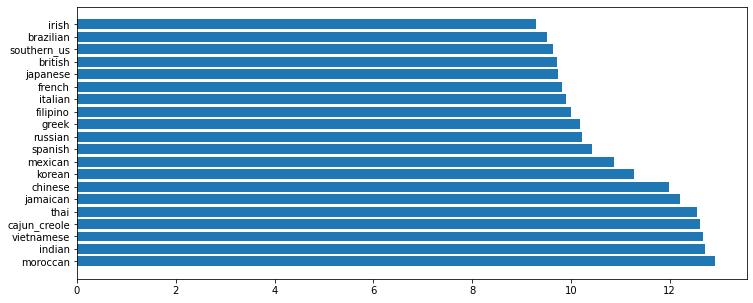

In [74]:
cuisines = temp.index
avg_no_ingredients = temp.values
plt.figure(figsize=(12,5))
plt.barh(cuisines, avg_no_ingredients)
plt.show()

*The cuisines with the most ingredients, on average, are Moroccan, Indian, and Vietnamese.*

### Distribution of the no_ingredients variable.

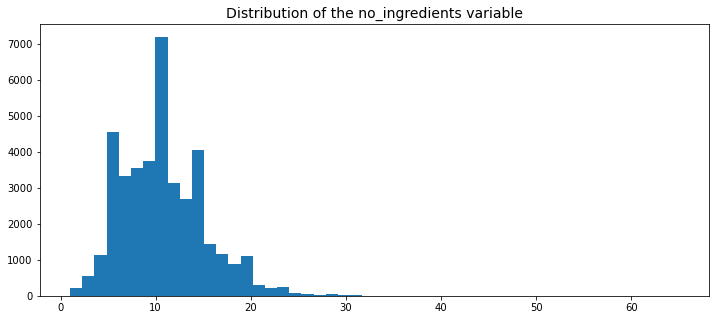

In [93]:
plt.figure(figsize=(12,5))
plt.hist(df['no_ingredients'], bins=50)
plt.title('Distribution of the no_ingredients variable', fontsize=14)
plt.savefig('../images/fig5.jpg', dpi=400)

*Most recipes have around 10 ingredients.*

In [107]:
df['ingredients_str'] = [', '.join(list_of_ingredients) for list_of_ingredients in df['ingredients']]

In [108]:
df.head()

,id,cuisine,ingredients,no_ingredients,ingredients_str
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,"romaine lettuce, black olives, grape tomatoes,..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,"plain flour, ground pepper, salt, tomatoes, gr..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,"water, vegetable oil, wheat, salt"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,"black pepper, shallots, cornflour, cayenne pep..."


In [109]:
df.columns

Index(['id', 'cuisine', 'ingredients', 'no_ingredients', 'ingredients_str'], dtype='object')

In [110]:
df.to_csv('../data/cuisines.csv', index=False)